# Line Charts

## What is a Line Chart?

A line chart is a type of graph used to display trends or patterns over time, usually with continuous data. In a line chart, data points are connected by a straight line, showing the progression of the variable being measured.

Line charts typically have the dependent variable on the y-axis and the independent variable (usually time) on the x-axis. The line in the chart represents the trend or pattern over time, and the slope of the line indicates the rate of change.

Line charts are commonly used in various fields such as finance, economics, science, and social sciences to analyze trends in data and to track changes over time. They are also useful for displaying data with multiple lines on the same chart, allowing for comparisons between different variables or data sets.

## Getting Started

Matplotlib is the library we will be using to create our line charts in this tutorial. There are other libraries that we could use to create line charts such as seaborn and plotly express that come with a variety of advanced features, but for this tutorial, the simplicity of matplotlib will do the trick. As you can see above the style was set to 'seaborn-darkgrid.'Feel free to change that to whatever you like. Find more styles at <a href= "https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html">Matplotlib: Style Sheet Reference</a>.

Numpy provides the functionality of n-dimensional arrays. Compared to Python lists, numpy arrays save memory usage and provide a variety of benefits for easy mathematical calculations.

Pandas is one of the go-to libraries for data analysis. While it can be used for data visualization, that is not what it will be used for here. Rather it will be used for its dataframe class to provide structure to the data so that it is more malleable.

To get started, go ahead and import the modules below. As a disclaimer, this guide assumes you are using Anaconda. If you are not, you may need to install these modules with the 'pip install' command. If you need extra help with this step, consult Python's <a href = "https://packaging.python.org/en/latest/tutorials/installing-packages/">guide</a> on this topic.

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import numpy as np
import pandas as pd

## Basic Line Chart with Matplotlib

Creating a basic line chart with Matplotlib is very simple. You need data for your x and y axis and to call the plot function. In the example below, we used to lists to plot our line chart. Our x list is populated with years ranging from 2000-2008 and the y list is simply randomly selected integers. One thing to be sure of when you are making a chart is to ensure that the shape/size of the lists are equal. If not, it will throw an error. The lists x and y are placed into the plot functions parameters, x represents the x-axis and y represents the y-axis.

After the bar function is called you can call functions to add extra labels and visual aids to improve the viewing experience. In this example, labels are created to define the X and Y axis and the Title goes across the top to define what the data in the chart is trying to display.

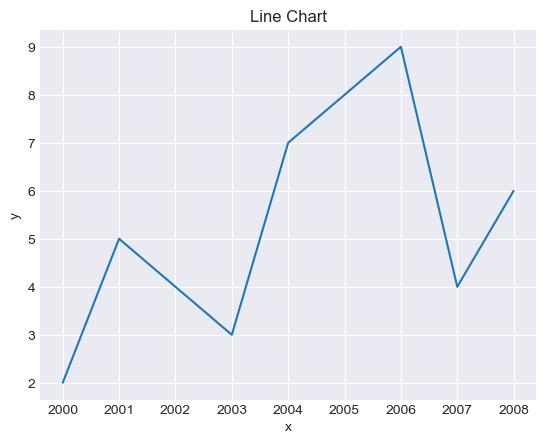

In [3]:
x = [2000,2001,2003,2004,2005,2006,2007,2008]
y = [2,5,3,7,8,9,4,6]

plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y') 
plt.title('Line Chart')
plt.show()

## Working with Real Data

Now that we did a simple example with made-up data, let's make an example with actual data.

The data we will use in this example will be on International Video Games Statistics. This data was found here on <a href='https://www.kaggle.com/datasets/thedevastator/global-video-game-sales-ratings'>Kaggle</a>.

If you have data you would rather use, feel free to use it. Just make sure to change the path in the data variable.

Start by reading the CSV into a variable using the pandas read_csv function. This will put everything into a dataframe object. The first row will be automatically read in as headers unless specified not to. Make sure to look through the data to get a feel for how everything is laid out. It is worth noting that all sales data is in the millions.

In [4]:
data = pd.read_csv('C:\\Users\\celes\\Documents\\Data\\VideoGameStats.csv')

data.head()

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Story Focus,Gameplay Focus,Series
0,.hack//Infection Part 1,2002.0,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.27,75.0,35.0,8.5,60.0,CyberConnect2,T,x,NaN,x
1,.hack//Mutation Part 2,2002.0,Role-Playing,Atari,0.23,0.18,0.20,0.06,0.68,76.0,24.0,8.9,81.0,CyberConnect2,T,x,NaN,x
2,.hack//Outbreak Part 3,2002.0,Role-Playing,Atari,0.14,0.11,0.17,0.04,0.46,70.0,23.0,8.7,19.0,CyberConnect2,T,x,NaN,x
3,[Prototype],2009.0,Action,Activision,0.84,0.35,0.00,0.12,1.31,78.0,83.0,7.8,356.0,Radical Entertainment,M,NaN,x,x
4,[Prototype],2009.0,Action,Activision,0.65,0.40,0.00,0.19,1.24,79.0,53.0,7.7,308.0,Radical Entertainment,M,NaN,x,x


For the first line chart, we are only going to plot data from two columns: Year_Of_Release and Global_Sales. We will use the groupby function from pandas to isolate the two columns we are interested in. This will automatically index the Year_Of_Release column unless specified otherwise. We will use the functions sum and sort_values on the Global_Sales column to sum up, and sort by the values of this column. Make sure to have Global_Sales in two sets of [ ] otherwise, it will try to read it as a series rather than a dataframe.

In [5]:
game_sales = data.groupby(["Year_of_Release"], group_keys = True)["Global_Sales"].sum()
game_sales.head()


Year_of_Release
1985.0     0.03
1988.0     0.03
1992.0     0.03
1994.0     1.27
1996.0    20.35
Name: Global_Sales, dtype: float64

After the data has been worked into something more usable. All you have to do is plug your dataframe into the plot function and add your labels.

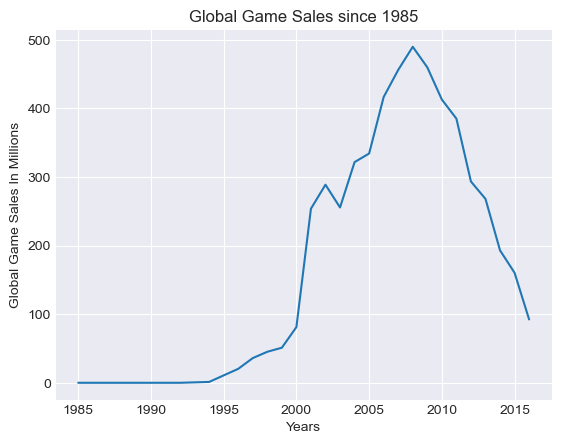

In [6]:
plt.plot(game_sales)

plt.xlabel('Years')
plt.ylabel('Global Game Sales In Millions') 
plt.title('Global Game Sales since 1985')
plt.show()

Now let's do another line chart. This time we will show the sales across North America, Europe, Japan, and Other. We will also limit the data to games that were released from 2000 and up.

Much like above, we will be using the groupby function on Year_of_Release. However this time, it will follow a query function for 'Year_of_Release >= 2000', reducing the number of records to only include those where the year is 2000 or higher. Since we have multiple sales columns we will use the .agg function to aggregate NA_Sales, EU_Sales, JP_Sales, and Other_Sales together while individually using the .sum() function on each column.

In [7]:
game_sales = data.query('Year_of_Release >= 2000').groupby(["Year_of_Release"], group_keys = True).agg({'NA_Sales': 'sum','EU_Sales': 'sum',
'JP_Sales': 'sum','Other_Sales': 'sum',})
game_sales.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year_of_Release,,,,
2000.0,39.34,25.20,11.27,5.49
2001.0,139.32,72.85,23.57,18.26
2002.0,163.76,84.03,18.61,22.30
2003.0,143.30,75.22,17.24,19.69
2004.0,173.88,83.02,22.74,42.14


This time we will use the pandas function plot.line() to plot our line graph. It will automatically plot whatever data is in our dataframe without having to pass anything in.

<AxesSubplot:xlabel='Year_of_Release'>

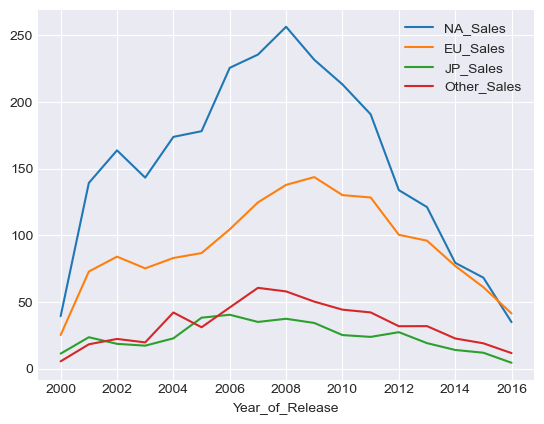

In [8]:
game_sales.plot.line()

You could also plot this chart as a stacked area graph for a similar function. You can choose whether or not you want the different sales areas to be stacked on top of each other by setting the 'stacked' parameter equal to true or false. It naturally defaults to true if it is not set.

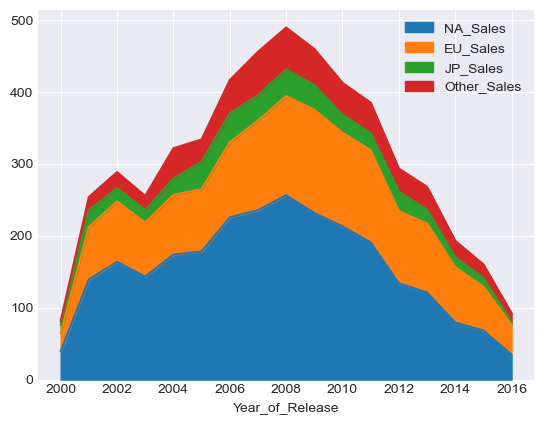

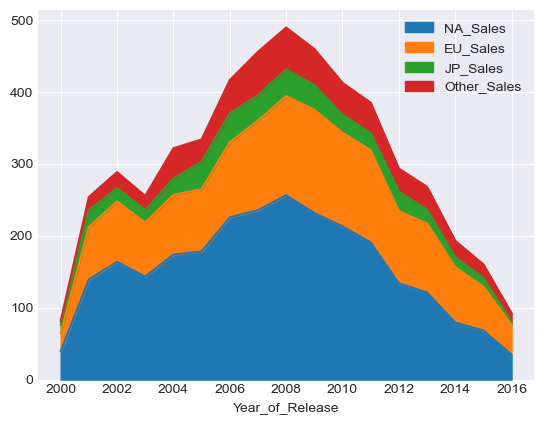

In [9]:
game_sales.plot.area(stacked=False)
plt.show()

game_sales.plot.area(stacked=True)
plt.show()